In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import OrderedDict
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

#data hasil preprocessing
data_baru = pd.read_csv("hasilpreprocessing_training.csv")

# #memilih feature yang akan digunakan keculali 'account_type'
X = data_baru.drop('account_type', axis=1)
y = data_baru['account_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)



In [2]:
data_baru.head()

,default_profile,favourites_count,followers_count,friends_count,id,location,statuses_count,verified,account_age_days,account_type,ratio_statuses_count_per_age,ratio_favorites_per_age,ratio_friends_per_followers,word_count,char_count,reputation,contains_bot_name,description_word_count,description_character_count,avg_word
0,True,491,0,0,2559057222,True,116,False,2261,bot,0.051305,0.217161,2.709532,7,63,0.000000,False,7,57,8.142857
1,True,1390,16,22,119284832,True,2033,False,3822,bot,0.531920,0.363684,1.375000,1,1,0.421053,False,1,1,1.000000
2,True,1444,8789,721,19663518,True,6026,False,4220,human,1.427962,0.342180,0.082034,17,107,0.924185,False,17,91,5.352941
3,False,6013,649266,898,72878707,True,7224,False,3996,human,1.807808,1.504755,0.001383,3,18,0.998619,False,3,16,5.333333
4,False,66356,62501,3390,23595924,True,68308,True,4179,human,16.345537,15.878440,0.054239,22,148,0.948551,False,23,125,5.434783


Akurasi: 0.8166666666666667


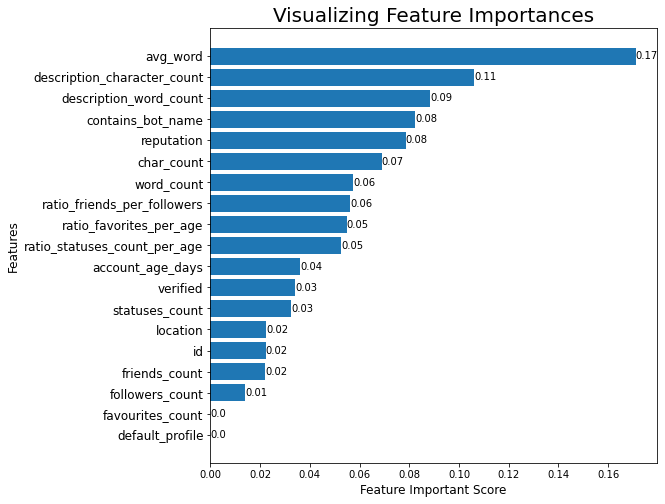

In [3]:
# Membuat model Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)

tree_feature =  pd.Series(model.feature_importances_, X.columns).sort_values(ascending = True)
plt.figure(figsize = (8,8))
plt.barh(X.columns, tree_feature)
plt.xlabel('Feature Important Score', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Visualizing Feature Importances', fontsize = 20)

# Menampilkan angka per fitur pada visualisasi
for i, v in enumerate(tree_feature):
    plt.text(v, i, str(round(v, 2)), color='black', va='center')

# memprediksi label atau target yang sesuai dengan fitur-fitur dalam X_test
y_pred = model.predict(X_test)

# Menghitung akurasi model pada dataset
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi:", accuracy)

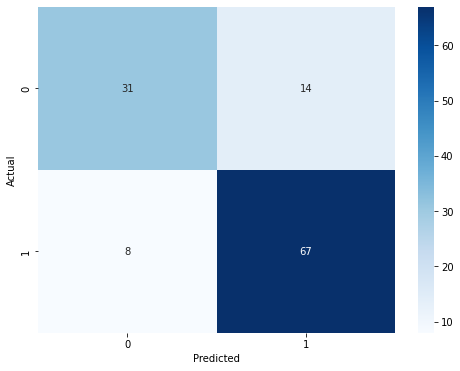

Confusion Matrix:
----------------------------------------
True Positif (TP): 67
False Positif (FP): 14
True Negatif (TN): 31
False Negatif (FN): 8


In [4]:
#menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan hasil prediksi model (y_pred)
cm = confusion_matrix(y_test, y_pred)

# membuat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# print(cm)

print("Confusion Matrix:")
print("----------------------------------------")
print("True Positif (TP):", cm[1, 1])
print("False Positif (FP):", cm[0, 1])
print("True Negatif (TN):", cm[0, 0])
print("False Negatif (FN):", cm[1, 0])

In [5]:
# mencetak laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bot       0.79      0.69      0.74        45
       human       0.83      0.89      0.86        75

    accuracy                           0.82       120
   macro avg       0.81      0.79      0.80       120
weighted avg       0.82      0.82      0.81       120



In [6]:
#menyimpan model klasifikasi Random Forest dengan menggunakan pipeline
pipe = make_pipeline(MinMaxScaler(),RandomForestClassifier()) 

# melakukan pelatihan (fitting) model pada data pelatihan (X_train dan y_train).
pipe.fit(X_train, y_train)

#menyimpan model yang telah dilatih ke dalam file dengan ekstensi .pkl
joblib.dump(pipe, 'model.pkl')

['model.pkl']